# **Task \#2**: Machine Learning MC886/MO444
##**Classical Machine Learning Techniques**##

In [ ]:
print('Marcelo Antunes Soares Fantini' + ' RA 108341')
print('Rubens de Castro Pereira' + ' RA 217146')

## Objective:

To explore **Linear Regression** and **Logistic Regression** alternatives and come up with the best possible model for the problems, at the same time avoiding overfitting (and also underfitting). In this work, we will train a model that use medical records from patients to predict patient survival.

## Dataset

The purpose of this dataset is to predict the patients' survival from medical records. These data is available in [Google Sheets](https://docs.google.com/spreadsheets/d/18-PlYBnwD7yJoyGJOsaB5Wydc2iTG9sSnbuuV4t4efE/edit?usp=sharing), consisting in 299 patients with heart failure collected in 2015. 

**Data Dictionary**:

- **AGE**: Age of the patient (years);

- **ANAEMIA**: Decrease of red blood cells or hemoglobin (boolean);

- **HIGH BLODD PRESSURE**: If the patient has hypertension (boolean);

- **CREATININE PHOSPHOKINASE (CPK)**: Level of the CPK enzyme in the blood (mcg/L);

- **DIABETES**: If the patient has diabetes (boolean);

- **EJECTION FRACTION**: Percentage of blood leaving the heart at each contraction (percentage);

- **PLATELETS**: Platelets in the blood (kiloplatelets/mL);

- **SEX**: Woman or man (binary);

- **SERUM CREATININE**: Level of serum creatinine in the blood (mg/dL);

- **SERUM SODIUM**: Level of serum sodium in the blood (mEq/L);

- **SMOKING**: If the patient smokes or not (boolean);

- **TIME**: Follow-up period (days);

- **DEATH EVENT**: If the patient deceased during the follow-up period (boolean);

More information about the dataset: *Chicco, D., Jurman, G. Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Med Inform Decis Mak 20, 16 (2020). https://doi.org/10.1186/s12911-020-1023-5*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

df = pd.read_csv('data/heart_dataset.csv').drop(columns=['time'])
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,No,582.0,No,20.0,1.0,265000.00,1.9,130.0,Female,No,1
1,55.0,No,7861.0,No,38.0,0.0,263358.03,1.1,136.0,Female,No,1
2,65.0,No,146.0,No,20.0,0.0,162000.00,1.3,129.0,Female,Yes,1
3,50.0,Yes,111.0,No,20.0,0.0,210000.00,1.9,137.0,Female,No,1
4,NaN,Yes,160.0,Yes,20.0,0.0,327000.00,2.7,116.0,Male,No,1


### Analysis


(0.5 points) This part of the assignmente aims to analyze the dataset and preprocess the data for the models. To do so, a fews things to be considered: 


*   Are there any outliers?
*   Are there missing values?
*   How will you handle categorical variables?

### Answers

#### Outliers

The following features have outliers:
- creatinine_phosphokinase
- ejection_fraction
- platelets
- serum_creatinine
- serum_sodium

#### Missing values

There are 24 missing values amongst features age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium and sex.

#### Categorical variables

Categorical variables will be converted to numeric features in order to simplify analysis, according to the following:

- In columns containing 'No' and 'Yes' we have used the dictionary `{'No' : 0, 'Yes' : 1}`;
- In the case of 'Male' and 'Female' we have used the dictionary `{'Male' : 0, 'Female' : 1}`.

Additionally, we will convert the column `high_blood_pressure` to `int64`.

#### Outliers

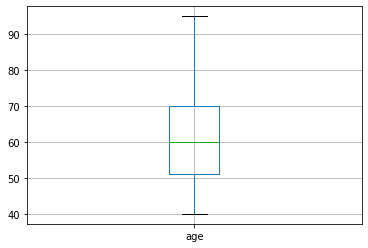

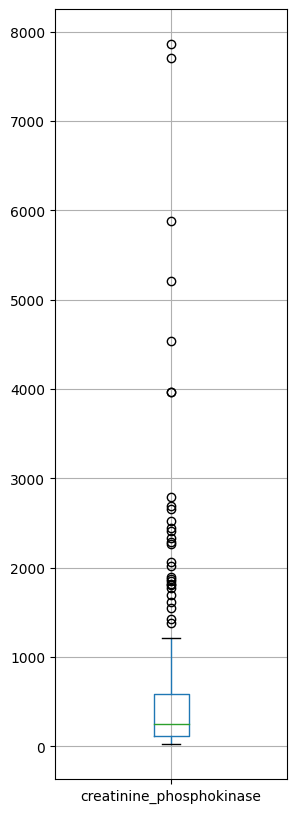

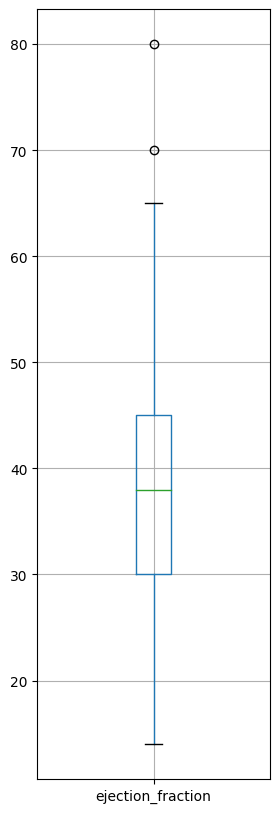

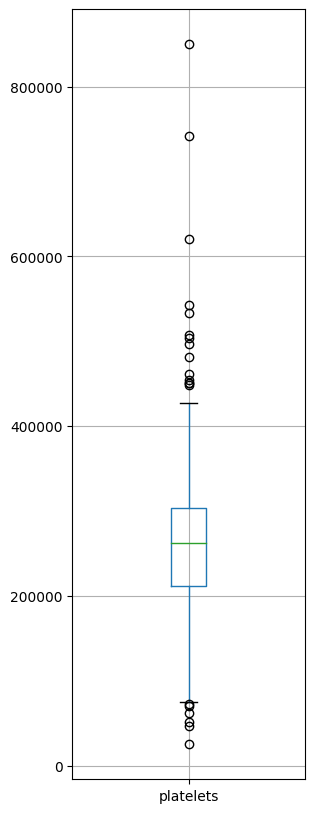

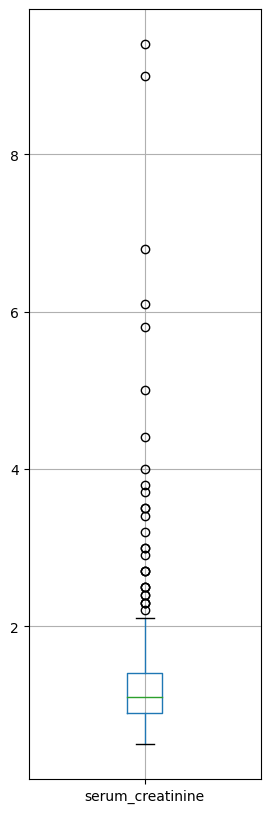

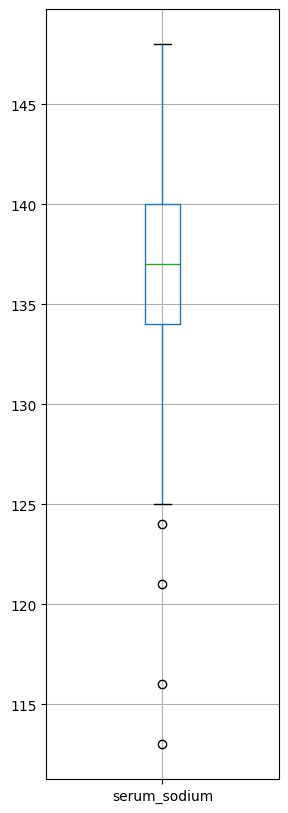

In [2]:
df.boxplot(['age'], figsize=(3,10))
plt.show()
df.boxplot(['creatinine_phosphokinase'], figsize=(3,10))
plt.show()
df.boxplot(['ejection_fraction'], figsize=(3,10))
plt.show()
df.boxplot(['platelets'], figsize=(3,10))
plt.show()
df.boxplot(['serum_creatinine'], figsize=(3,10))
plt.show()
df.boxplot(['serum_sodium'], figsize=(3,10))
plt.show()

#### Missing values

In [3]:
# Missing values
print(df.isnull().sum())

age                         4
anaemia                     1
creatinine_phosphokinase    2
diabetes                    2
ejection_fraction           2
high_blood_pressure         2
platelets                   3
serum_creatinine            2
serum_sodium                1
sex                         5
smoking                     0
DEATH_EVENT                 0
dtype: int64


In [4]:
# getting all NaN values in the columns as missing values 
frames = [ 
    df[df['age'].isna()],
    df[df['anaemia'].isna()],
    df[df['creatinine_phosphokinase'].isna()],
    df[df['diabetes'].isna()],
    df[df['ejection_fraction'].isna()],
    df[df['high_blood_pressure'].isna()],
    df[df['platelets'].isna()],
    df[df['serum_creatinine'].isna()],
    df[df['serum_sodium'].isna()],
    df[df['sex'].isna()],
    df[df['smoking'].isna()],
    df[df['DEATH_EVENT'].isna()]
]

df_missing_values = pd.concat(frames, ignore_index=False)
df_missing_values.sort_index()
df_missing_values

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
4,NaN,Yes,160.0,Yes,20.0,0.0,327000.00,2.7,116.0,Male,No,1
17,NaN,No,582.0,No,14.0,0.0,166000.00,0.8,127.0,Female,No,1
295,NaN,No,1820.0,No,38.0,0.0,NaN,1.2,139.0,Male,No,0
296,NaN,No,2060.0,Yes,60.0,0.0,742000.00,0.8,138.0,Male,No,0
294,62.0,NaN,61.0,Yes,38.0,1.0,155000.00,1.1,143.0,Female,Yes,0
253,70.0,No,NaN,Yes,35.0,1.0,236000.00,1.2,132.0,Male,No,0
298,50.0,No,NaN,No,45.0,0.0,395000.00,1.6,136.0,Female,Yes,0
276,70.0,No,618.0,NaN,35.0,0.0,327000.00,1.1,142.0,Male,No,0
281,70.0,No,582.0,NaN,NaN,0.0,51000.00,2.7,136.0,Female,Yes,0
254,53.0,Yes,446.0,No,NaN,1.0,263358.03,1.0,139.0,Female,No,0


# Preparation of dataset

1. We drop rows with missing values;
2. We do not remove rows with outliers;
3. We convert categorical variables into numeric values.

In [5]:
# dropping missing values
df.dropna(inplace=True)
df.describe()

,age,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,DEATH_EVENT
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,60.979545,581.960289,38.054152,0.364621,263354.998881,1.406751,136.646209,0.335740
std,12.079913,988.979954,11.924610,0.482195,94571.007935,1.063068,4.217514,0.473103
min,40.000000,23.000000,15.000000,0.000000,25100.000000,0.500000,113.000000,0.000000
25%,50.000000,115.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000
50%,60.000000,248.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,0.000000
75%,70.000000,582.000000,45.000000,1.000000,303000.000000,1.400000,140.000000,1.000000
max,95.000000,7861.000000,80.000000,1.000000,850000.000000,9.400000,146.000000,1.000000


In [6]:
# Replacing categorical variables
# anaemia: no -> 0, yes -> 1
# diabetes: no -> 0, yes -> 1
# sex: male -> 0, female -> 1
# smoking: no -> 0, yes -> 1

df.replace({'No' : 0, 'Yes' : 1}, inplace=True)
df.replace({'Male' : 0, 'Female' : 1}, inplace=True)
df = df.replace({'high_blood_pressure' : {1.0 : 1, 0.0 : 0}}).astype({'high_blood_pressure' :'int64'})
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582.0,0,20.0,1,265000.00,1.9,130.0,1,0,1
1,55.0,0,7861.0,0,38.0,0,263358.03,1.1,136.0,1,0,1
2,65.0,0,146.0,0,20.0,0,162000.00,1.3,129.0,1,1,1
3,50.0,1,111.0,0,20.0,0,210000.00,1.9,137.0,1,0,1
5,90.0,1,47.0,0,40.0,1,204000.00,2.1,132.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
287,45.0,0,582.0,1,55.0,0,543000.00,1.0,132.0,0,0,0
289,90.0,1,337.0,0,38.0,0,390000.00,0.9,144.0,0,0,0
290,45.0,0,615.0,1,55.0,0,222000.00,0.8,141.0,0,0,0
293,63.0,1,103.0,1,35.0,0,179000.00,0.9,136.0,1,1,0


## Linear Regression

(0.75 points) This part of the assigment aims to predict the level of serum creatinine in the blod based on their medical records. 

*   Do we need to split the data into train, valid and test? How?
*   Do we need to normalize the data? How? The normalization is equal to train, valid and test split?
* **Target value: serum_creatinine**.

Obs: drop the DEATH_EVENT column.

In [7]:
# TODO: Split data and normalize. You can use scikit-learn libraries.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [8]:
df_lin_reg = df.drop(columns=['DEATH_EVENT'])
df_lin_reg.reset_index(inplace=True)
df_lin_reg.drop(columns=['index'], inplace=True)
df_lin_reg

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582.0,0,20.0,1,265000.00,1.9,130.0,1,0
1,55.0,0,7861.0,0,38.0,0,263358.03,1.1,136.0,1,0
2,65.0,0,146.0,0,20.0,0,162000.00,1.3,129.0,1,1
3,50.0,1,111.0,0,20.0,0,210000.00,1.9,137.0,1,0
4,90.0,1,47.0,0,40.0,1,204000.00,2.1,132.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
272,45.0,0,582.0,1,55.0,0,543000.00,1.0,132.0,0,0
273,90.0,1,337.0,0,38.0,0,390000.00,0.9,144.0,0,0
274,45.0,0,615.0,1,55.0,0,222000.00,0.8,141.0,0,0
275,63.0,1,103.0,1,35.0,0,179000.00,0.9,136.0,1,1


### Splitting data into training, validation and test sets

In [ ]:
# features = df_lin_reg.loc[:, df_lin_reg.columns != 'serum_creatinine']
# wanted = df_lin_reg[['serum_creatinine']]
X = df_lin_reg.drop(columns=['serum_creatinine'])
y = df_lin_reg[['serum_creatinine']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.4, random_state=42)

X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, train_size=0.5, random_state=42)

### Feature scaling on training, validation and test sets

In [ ]:
scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_valid = scaler.fit_transform(X_valid)
scaled_X_test = scaler.fit_transform(X_test)

scaled_y_train = scaler.fit_transform(y_train)
scaled_y_valid = scaler.fit_transform(y_valid)
scaled_y_test = scaler.fit_transform(y_test)

### Activities

1. (0.5 points) Verify if there is any feature that has low correlation with the target variables. You can use the function [mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html) to check the importance of each feature. 

> *   Do we need all the features to predict the target value?
> *   What happens if we drop the low correlation features?

We do not need all features since some of them have zero correlation. The columns with no correlation are `anaemia, diabetes, high_blood_pressure, smoking`.

In [ ]:
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(X, y, random_state=42)
print(mutual_info)
# 2, 3, 4, 10


# mutual_info_train = mutual_info_regression(scaled_X_train, scaled_y_train)
# print(mutual_info_train)

In [ ]:
df_lin_reg.corr()

In [ ]:
df_lin_reg.columns

In [ ]:
# drop anaemia, sex, smoking, platelets
slim_new_df = df_lin_reg.drop(columns=['anaemia', 'sex', 'smoking', 'platelets'])
slim_new_df

> What are the conclusions? (1-2 paragraphs)

2. (2.0 points) Perform Linear Regression. You should implement your solution and compare it with ```sklearn.linear_model.SGDRegressor``` (linear model fitted by minimizing a regularized empirical loss with SGD, http://scikit-learn.org).

In [ ]:
# TODO: MSE Loss. You cannot use scikit-learn!!
def MSE(y, X, w):
    # convert to arrays
    y = np.asarray(y)
    X = np.asarray(X)
    w = np.asarray(w)

    # compute Xw and get number of items
    prod = np.dot(w, X)
    N = len(y)

    mse = np.sum((y - prod)**2) / N

    return mse

In [ ]:
# TODO: Linear Regression. Implement yout solution. You cannot use scikit-learn, Keras/TensorFlow, or PyTorch libraries!!
class LinearRegression():
  def __init__(self, learning_rate=-1, max_iter=-1):
    self.max_iter         = max_iter
    self.learning_rate    = learning_rate
    self.weights          = None
    self.bias             = None

  def predict(self, X):
    w = self.weights

    y_pred = np.dot(X, w)

    return y_pred

  def fit(self, X, y):
    X_pinv = np.linalg.pinv(X)

    self.weights = np.dot(X_pinv, y)
    return self.weights

In [ ]:
# TODO: Linear Regression. You can use scikit-learn libraries.
from sklearn.linear_model import SGDRegressor

In [ ]:
reg = SGDRegressor()

reg.fit(X_train, y_train)
reg.predict(X_test)

> What are the conclusions? (1-2 paragraphs)

3. (0.5 points) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

In [ ]:
# TODO: Plot the cost function vs. number of iterations in the training set.

> What are the conclusions? (1-2 paragraphs)

4. (0.75 points) Use different learning rates when optimizing the model. You can use the model that you implemented or the model from scikit-learn.

> If you prefer to use the SGDRegressor from scikit-learn, use the parameter ```learning_rate='constant'``` and change the ```eta0```.

In [ ]:
# TODO: Different learning rates. You can use scikit-learn libraries.


> What are the conclusions? (1-2 paragraphs)

5. (0.5 points) Sometimes, we need some more complex function to make good prediction. Evaluate a [Polynomial Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) model. 

In [ ]:
# TODO: Complex model. You can use scikit-learn libraries.

> What are the conclusions? (1-2 paragraphs)

6. (0.5 points) Pick **your best model**, based on your validation set, and predict the target values for the test set.

In [ ]:
# TODO: Plot the true label and the predict label

## Logistic Regression

This part of the assigment aims to predict the patients survival based on their medical records. 

*   Do we need to split the data into train, valid and test? How?
*   Do we need to normalize the data? How? The normalization is equal to train, valid and test split?
* **Target value: DEATH EVENT**.

In [9]:
df_log_reg = df.copy()
df_log_reg.reset_index(inplace=True)
df_log_reg.drop(columns=['index'], inplace=True)
df_log_reg

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582.0,0,20.0,1,265000.00,1.9,130.0,1,0,1
1,55.0,0,7861.0,0,38.0,0,263358.03,1.1,136.0,1,0,1
2,65.0,0,146.0,0,20.0,0,162000.00,1.3,129.0,1,1,1
3,50.0,1,111.0,0,20.0,0,210000.00,1.9,137.0,1,0,1
4,90.0,1,47.0,0,40.0,1,204000.00,2.1,132.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
272,45.0,0,582.0,1,55.0,0,543000.00,1.0,132.0,0,0,0
273,90.0,1,337.0,0,38.0,0,390000.00,0.9,144.0,0,0,0
274,45.0,0,615.0,1,55.0,0,222000.00,0.8,141.0,0,0,0
275,63.0,1,103.0,1,35.0,0,179000.00,0.9,136.0,1,1,0


In [10]:
X_log_reg = df_log_reg.drop(columns=['DEATH_EVENT'])
y_log_reg = df_log_reg[['DEATH_EVENT']]

1. (0.5 points) Verify if there is any feature that has low correlation with the target variables. You can use the function [mutual_info_classification](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) to check the importance of each feature.

### Answer

By using `mutual_info_classif` we have established that the columns with higher correlation are `age, ejection_fraction, serum_creatinine`. This higher correlation is in a relative sense rather than absolute sense since all values are very low, none of them higher than 10%. Therefore, our analysis shall consider three cases for logistic regression: using all features, using only `age, ejection_fraction, serum_creatinine` and using all but `diabetes, high_blood_pressure, platelets`, all three of which have correlation zero.

### Code

In [11]:
from sklearn.feature_selection import mutual_info_classif

In [12]:
mutual_info_classif(X_log_reg, y_log_reg, random_state=42)

c:\Users\marce\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.08554084, 0.03824267, 0.01422583, 0.        , 0.08849996,
       0.        , 0.        , 0.07347321, 0.00010518, 0.01083803,
       0.00535315])

In [13]:
X_log_reg.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking'],
      dtype='object')

In [14]:
X_log_reg_simplified_3 = X_log_reg[['age', 'ejection_fraction', 'serum_creatinine']]
X_log_reg_simplified_3

,age,ejection_fraction,serum_creatinine
0,75.0,20.0,1.9
1,55.0,38.0,1.1
2,65.0,20.0,1.3
3,50.0,20.0,1.9
4,90.0,40.0,2.1
...,...,...,...
272,45.0,55.0,1.0
273,90.0,38.0,0.9
274,45.0,55.0,0.8
275,63.0,35.0,0.9


In [15]:
X_log_reg_simplified_8 = X_log_reg.drop(columns=['diabetes', 'high_blood_pressure', 'platelets'])
X_log_reg_simplified_8

,age,anaemia,creatinine_phosphokinase,ejection_fraction,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582.0,20.0,1.9,130.0,1,0
1,55.0,0,7861.0,38.0,1.1,136.0,1,0
2,65.0,0,146.0,20.0,1.3,129.0,1,1
3,50.0,1,111.0,20.0,1.9,137.0,1,0
4,90.0,1,47.0,40.0,2.1,132.0,1,1
...,...,...,...,...,...,...,...,...
272,45.0,0,582.0,55.0,1.0,132.0,0,0
273,90.0,1,337.0,38.0,0.9,144.0,0,0
274,45.0,0,615.0,55.0,0.8,141.0,0,0
275,63.0,1,103.0,35.0,0.9,136.0,1,1


> What are the conclusions? (1-2 paragraphs)

2. (2 points) Perform Multinomial Logistic Regression.

In [16]:
# TODO: Logistic Regression. You can use scikit-learn libraries.

from sklearn.linear_model import LogisticRegression

log_reg_1 = LogisticRegression(multi_class='auto', random_state=42)
log_reg_2 = LogisticRegression(multi_class='ovr', random_state=42)
log_reg_3 = LogisticRegression(multi_class='multinomial', random_state=42)
log_reg_4 = LogisticRegression(C=0.5, multi_class='auto', random_state=42)
log_reg_5 = LogisticRegression(C=0.5, multi_class='ovr', random_state=42)
log_reg_6 = LogisticRegression(C=0.5, multi_class='multinomial', random_state=42)
log_reg_7 = LogisticRegression(C=10, multi_class='auto', random_state=42)
log_reg_8 = LogisticRegression(C=10, multi_class='ovr', random_state=42)
log_reg_9 = LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [17]:
X_log_reg_train_all, X_log_reg_test_all, y_log_reg_train_all, y_log_reg_test_all = train_test_split(X_log_reg, y_log_reg, test_size=0.3, random_state=42)
X_log_reg_train_3, X_log_reg_test_3, y_log_reg_train_3, y_log_reg_test_3 = train_test_split(X_log_reg_simplified_3, y_log_reg, test_size=0.3, random_state=42)
X_log_reg_train_8, X_log_reg_test_8, y_log_reg_train_8, y_log_reg_test_8 = train_test_split(X_log_reg_simplified_8, y_log_reg, test_size=0.3, random_state=42)

In [18]:
log_reg_scaler = MinMaxScaler()

scaled_X_log_reg_train_all = log_reg_scaler.fit_transform(X_log_reg_train_all)
scaled_X_log_reg_test_all = log_reg_scaler.fit_transform(X_log_reg_test_all)

scaled_X_log_reg_train_3 = log_reg_scaler.fit_transform(X_log_reg_train_3)
scaled_X_log_reg_test_3 = log_reg_scaler.fit_transform(X_log_reg_test_3)

scaled_X_log_reg_train_8 = log_reg_scaler.fit_transform(X_log_reg_train_8)
scaled_X_log_reg_test_8 = log_reg_scaler.fit_transform(X_log_reg_test_8)

In [19]:
log_reg_1.fit(scaled_X_log_reg_train_all, y_log_reg_train_all)
log_reg_2.fit(scaled_X_log_reg_train_all, y_log_reg_train_all)
log_reg_3.fit(scaled_X_log_reg_train_all, y_log_reg_train_all)
log_reg_4.fit(scaled_X_log_reg_train_all, y_log_reg_train_all)
log_reg_5.fit(scaled_X_log_reg_train_all, y_log_reg_train_all)
log_reg_6.fit(scaled_X_log_reg_train_all, y_log_reg_train_all)
log_reg_7.fit(scaled_X_log_reg_train_all, y_log_reg_train_all)
log_reg_8.fit(scaled_X_log_reg_train_all, y_log_reg_train_all)
log_reg_9.fit(scaled_X_log_reg_train_all, y_log_reg_train_all)

c:\Users\marce\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
log_reg_1.fit(scaled_X_log_reg_train_all, y_log_reg_train_all)
log_reg_2.fit(scaled_X_log_reg_train_all, y_log_reg_train_all)
log_reg_3.fit(scaled_X_log_reg_train_all, y_log_reg_train_all)
log_reg_4.fit(scaled_X_log_reg_train_all, y_log_reg_train_all)
log_reg_5.fit(scaled_X_log_reg_train_all, y_log_reg_train_all)
log_reg_6.fit(scaled_X_log_reg_train_all, y_log_reg_train_all)
log_reg_7.fit(scaled_X_log_reg_train_all, y_log_reg_train_all)
log_reg_8.fit(scaled_X_log_reg_train_all, y_log_reg_train_all)
log_reg_9.fit(scaled_X_log_reg_train_all, y_log_reg_train_all)

> What are the conclusions? (1-2 paragraphs)


3. (1.5 points) Another factor that can alter the model result it's if the dataset is balanced:

*   The dataset is balanced ?
*   In this case, which technique is better: *oversampling* or *undersampling*?

Obs: You can use [RandomOverSampling](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html) and [RandomUnderSampling](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html#imblearn.under_sampling.RandomUnderSampler). But you can try others techniques.

### Answer

1. The dataset isn't balanced, as seen by the bar chart. The number of `DEATH_EVENT` events equal to 0 is roughly twice the number of events equal to 1.
2. **TODO:** Decide over oversampling and undersampling.

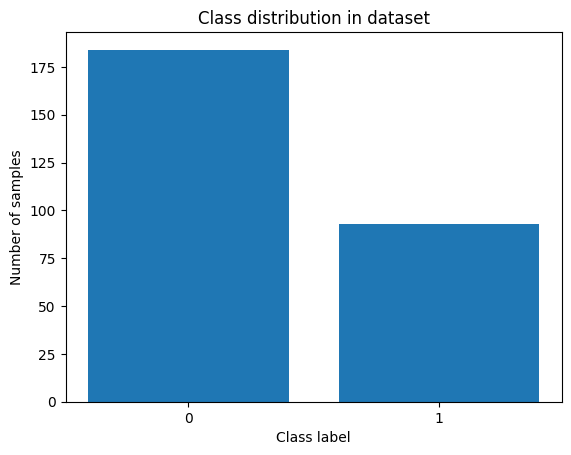

In [20]:
unique_labels, counts = np.unique(y_log_reg, return_counts=True)

plt.bar(unique_labels, counts)
plt.xlabel('Class label')
plt.xticks([0, 1])
plt.ylabel('Number of samples')
plt.title('Class distribution in dataset')
plt.show()

In [21]:
# TODO: Oversampling. You can use scikit-learn and imblearn libraries.
from imblearn.over_sampling import RandomOverSampler

In [24]:
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_log_reg, y_log_reg)

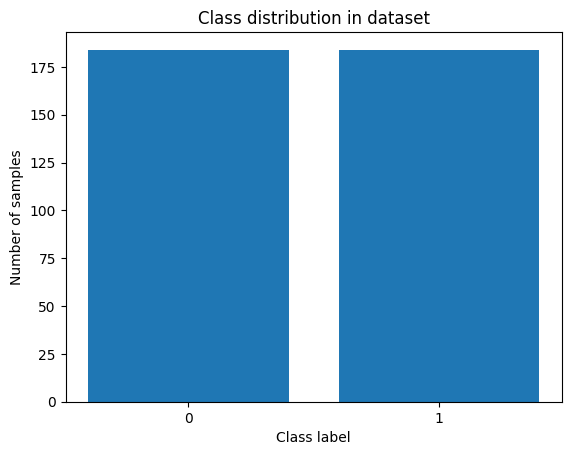

In [26]:
unique_labels, counts = np.unique(y_ros, return_counts=True)

plt.bar(unique_labels, counts)
plt.xlabel('Class label')
plt.xticks([0, 1])
plt.ylabel('Number of samples')
plt.title('Class distribution in dataset')
plt.show()

In [22]:
# TODO: Undersampling. You can use scikit-learn and imblearn libraries.
from imblearn.under_sampling import RandomUnderSampler

In [29]:
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_log_reg, y_log_reg)

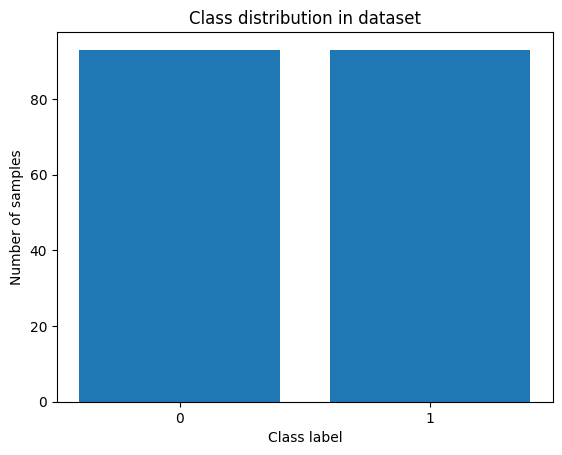

In [30]:
unique_labels, counts = np.unique(y_rus, return_counts=True)

plt.bar(unique_labels, counts)
plt.xlabel('Class label')
plt.xticks([0, 1])
plt.ylabel('Number of samples')
plt.title('Class distribution in dataset')
plt.show()

> What are the conclusions? (1-2 paragraphs)

4. (0.5 points) Pick **your best model** and plot the confusion matrix in the **test set**. 


In [ ]:
# TODO: Plot the confusion matrix. You can use scikit-learn, seaborn, matplotlib libraries.

> What are the conclusions? (1-2 paragraphs)

## Deadline

Wednesday, April 19, 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- April 20, 11:59 pm : grade * 0.75
- April 21, 11:59 pm : grade * 0.5
- April 22, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**